# Start Spark Sesssion 

In [4]:
from pyspark.sql import SparkSession
# Initialize a Spark session
spark = SparkSession.builder .appName("Sales Data Analysis").getOrCreate()

# Sales Dateframe 

In [5]:
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,DateType 
schema=StructType([
StructField("product_id",IntegerType(),True), 
StructField("customer_id",StringType(),True),
StructField("order_date",DateType(),True),
StructField("location",StringType(),True), 
StructField("source_order",StringType(),True) 
])  

In [6]:
sales_df=spark.read.format("csv").option("inferschema","true").schema(schema).load("sales.csv.txt")

In [7]:
sales_df.show() 

+----------+-----------+----------+--------+------------+
|product_id|customer_id|order_date|location|source_order|
+----------+-----------+----------+--------+------------+
|         1|          A|2023-01-01|   India|      Swiggy|
|         2|          A|2022-01-01|   India|      Swiggy|
|         2|          A|2023-01-07|   India|      Swiggy|
|         3|          A|2023-01-10|   India|  Restaurant|
|         3|          A|2022-01-11|   India|      Swiggy|
|         3|          A|2023-01-11|   India|  Restaurant|
|         2|          B|2022-02-01|   India|      Swiggy|
|         2|          B|2023-01-02|   India|      Swiggy|
|         1|          B|2023-01-04|   India|  Restaurant|
|         1|          B|2023-02-11|   India|      Swiggy|
|         3|          B|2023-01-16|   India|      zomato|
|         3|          B|2022-02-01|   India|      zomato|
|         3|          C|2023-01-01|   India|      zomato|
|         1|          C|2023-01-01|      UK|      Swiggy|
|         6|  

# Deriving year, month, quarter 

In [8]:
from pyspark.sql.functions import month,year,quarter 
sales_df=sales_df.withColumn("order_year",year(sales_df.order_date))
sales_df=sales_df.withColumn("order_month",month(sales_df.order_date)) 
sales_df=sales_df.withColumn("order_quarter",quarter(sales_df.order_date)) 
sales_df.show()   

+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|product_id|customer_id|order_date|location|source_order|order_year|order_month|order_quarter|
+----------+-----------+----------+--------+------------+----------+-----------+-------------+
|         1|          A|2023-01-01|   India|      Swiggy|      2023|          1|            1|
|         2|          A|2022-01-01|   India|      Swiggy|      2022|          1|            1|
|         2|          A|2023-01-07|   India|      Swiggy|      2023|          1|            1|
|         3|          A|2023-01-10|   India|  Restaurant|      2023|          1|            1|
|         3|          A|2022-01-11|   India|      Swiggy|      2022|          1|            1|
|         3|          A|2023-01-11|   India|  Restaurant|      2023|          1|            1|
|         2|          B|2022-02-01|   India|      Swiggy|      2022|          2|            1|
|         2|          B|2023-01-02|   India|      

# Menu Dataframe  

In [9]:
from pyspark.sql.types import StructField,StructType,IntegerType,StringType,DateType 
schema=StructType([
StructField("product_id",IntegerType(),True), 
StructField("product_name",StringType(),True),
StructField("price",StringType(),True)
])  


In [10]:
menu_df=spark.read.format("csv").option("inferschema","true").schema(schema).load("menu.csv.txt")

In [11]:
menu_df.show()

+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|         1|       PIZZA|  100|
|         2|     Chowmin|  150|
|         3|    sandwich|  120|
|         4|        Dosa|  110|
|         5|     Biryani|   80|
|         6|       Pasta|  180|
+----------+------------+-----+



# Total Amount spent By each Customer 

In [24]:
total_amount_spent = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('customer_id')
    .agg({'price': 'sum'})
    .orderBy('customer_id')
)
total_amount_spent.show() 


+-----------+----------+
|customer_id|sum(price)|
+-----------+----------+
|          A|    4260.0|
|          B|    4440.0|
|          C|    2400.0|
|          D|    1200.0|
|          E|    2040.0|
+-----------+----------+



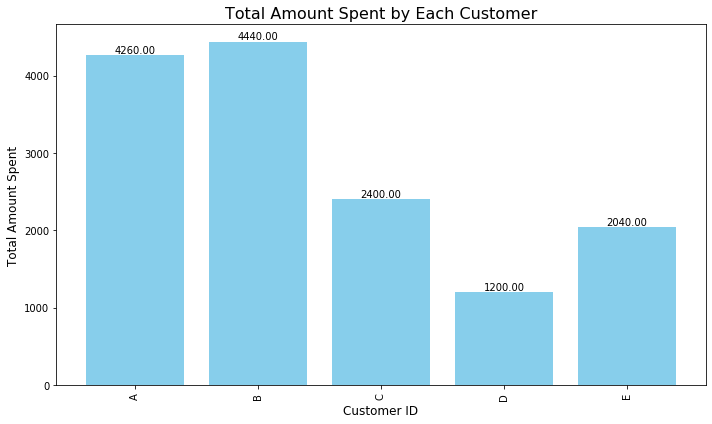

In [25]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent.collect()

# Extract customer IDs and total amount spent
customer_ids = [row['customer_id'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(customer_ids, total_spent, color='skyblue')

# Add titles and labels
plt.title('Total Amount Spent by Each Customer', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xticks(rotation=90)

# Add total amount above each bar
for bar, amount in zip(bars, total_spent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{amount:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


# Total Amount spent by each Food Category 

In [17]:
total_amount_spent_by_food_category = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('product_name')
    .agg({'price': 'sum'})
    .orderBy('product_name')
)
total_amount_spent.show()  


+------------+----------+
|product_name|sum(price)|
+------------+----------+
|     Biryani|     480.0|
|     Chowmin|    3600.0|
|        Dosa|    1320.0|
|       PIZZA|    2100.0|
|       Pasta|    1080.0|
|    sandwich|    5760.0|
+------------+----------+



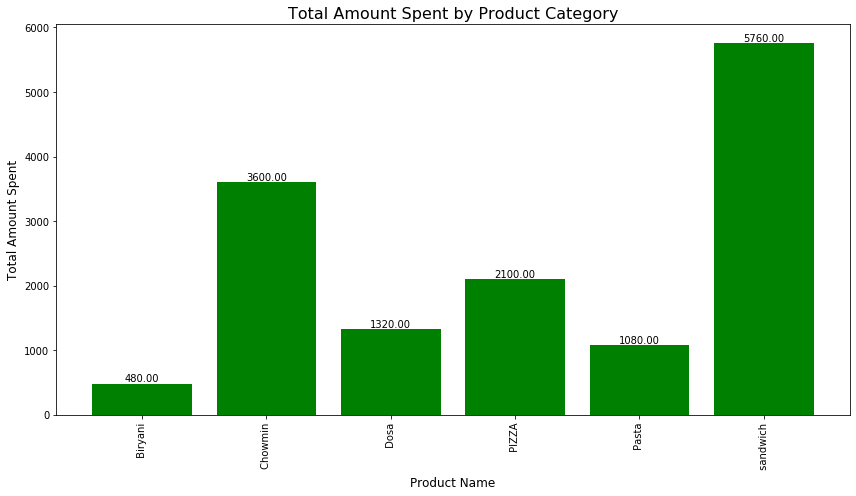

In [21]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent_by_food_category.collect()

# Extract product names and total amount spent from the data
product_names = [row['product_name'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(product_names, total_spent, color='green')

# Add titles and labels
plt.title('Total Amount Spent by Product Category', fontsize=16)
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xticks(rotation=90)

# Add total amount above each bar
for bar, amount in zip(bars, total_spent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{amount:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


# Total_amount spent by ordermonth 

In [26]:
total_amount_spent_by_order_month = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('order_month')
    .agg({'price': 'sum'})
    .orderBy('order_month')
) 
total_amount_spent_by_order_month.show()  


+-----------+----------+
|order_month|sum(price)|
+-----------+----------+
|          1|    2960.0|
|          2|    2730.0|
|          3|     910.0|
|          5|    2960.0|
|          6|    2960.0|
|          7|     910.0|
|         11|     910.0|
+-----------+----------+



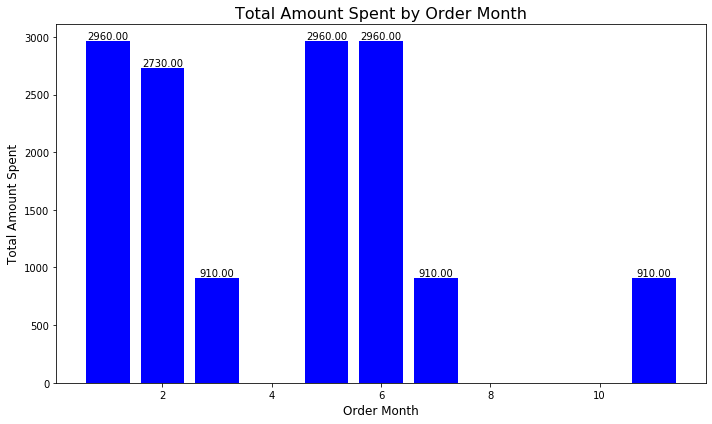

In [27]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent_by_order_month.collect()

# Extract order months and total amount spent
order_months = [row['order_month'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(order_months, total_spent, color='blue')

# Add titles and labels
plt.title('Total Amount Spent by Order Month', fontsize=16)
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)

# Add total amount above each bar
for bar, amount in zip(bars, total_spent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{amount:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


# Total_amount spent by order_year 

In [28]:
total_amount_spent_by_order_year = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('order_year')
    .agg({'price': 'sum'})
    .orderBy('order_year')
) 
total_amount_spent_by_order_year.show()   


+----------+----------+
|order_year|sum(price)|
+----------+----------+
|      2022|    4350.0|
|      2023|    9990.0|
+----------+----------+



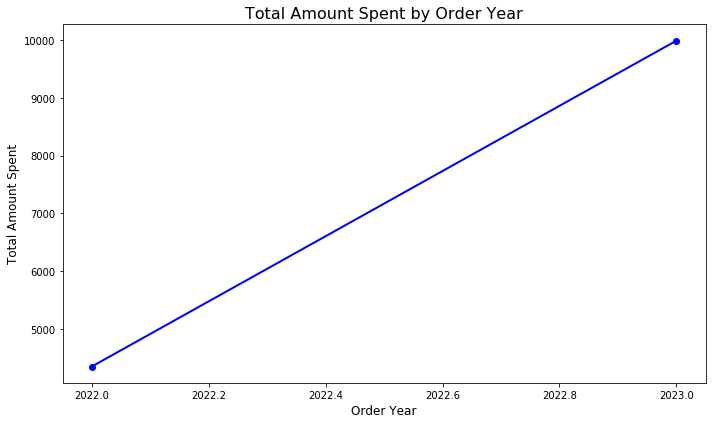

In [30]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent_by_order_year.collect()

# Extract order years and total amount spent
order_years = [row['order_year'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(order_years, total_spent, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6)

# Add titles and labels
plt.title('Total Amount Spent by Order Year', fontsize=16)
plt.xlabel('Order Year', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)


# Show the chart
plt.tight_layout()
plt.show()


# Total amount spent By order quarter

In [31]:
total_amount_spent_by_order_quarter = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('order_quarter')
    .agg({'price': 'sum'})
    .orderBy('order_quarter')
) 
total_amount_spent_by_order_quarter.show()   


+-------------+----------+
|order_quarter|sum(price)|
+-------------+----------+
|            1|    6600.0|
|            2|    5920.0|
|            3|     910.0|
|            4|     910.0|
+-------------+----------+



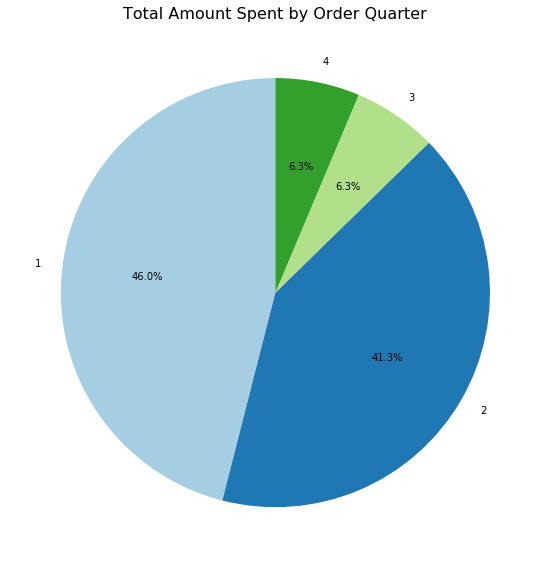

In [32]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent_by_order_quarter.collect()

# Extract order quarters and total amount spent
order_quarters = [row['order_quarter'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_spent, labels=order_quarters, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Total Amount Spent by Order Quarter', fontsize=16)

# Show the chart
plt.tight_layout()
plt.show()


# How many times each product purchased 

In [37]:
from pyspark.sql.functions import count  
most_df=(sales_df.join(menu_df,'product_id').groupBy('product_id','product_name')
    .agg(count('product_id').alias('product_count'))
        .orderBy('product_count',ascending=0)
        .drop('product_id')) 
most_df.show()

+------------+-------------+
|product_name|product_count|
+------------+-------------+
|    sandwich|           48|
|     Chowmin|           24|
|       PIZZA|           21|
|        Dosa|           12|
|     Biryani|            6|
|       Pasta|            6|
+------------+-------------+



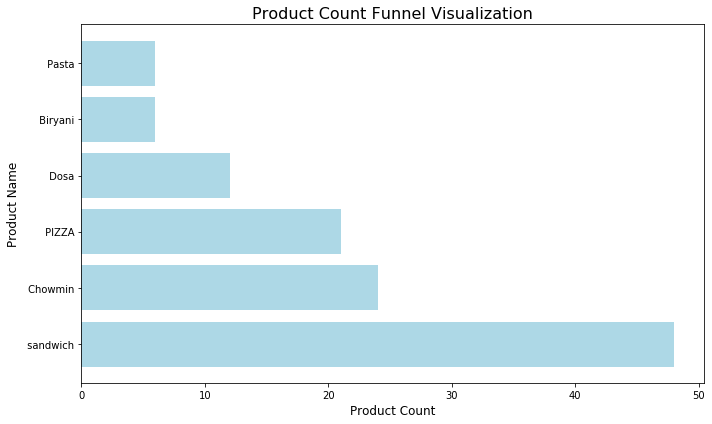

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Collect the data from the DataFrame
data = most_df.collect()

# Extract product names and product counts
product_names = [row['product_name'] for row in data]
product_counts = [row['product_count'] for row in data]

# Create a DataFrame for easier manipulation
funnel_data = pd.DataFrame({'Product Name': product_names, 'Product Count': product_counts})

# Sort the DataFrame by Product Count
funnel_data = funnel_data.sort_values('Product Count', ascending=False)

# Create a figure for the funnel chart
plt.figure(figsize=(10, 6))

# Create a horizontal bar chart to represent the funne
plt.barh(funnel_data['Product Name'], funnel_data['Product Count'], color='lightblue')

# Add titles and labels
plt.title('Product Count Funnel Visualization', fontsize=16)
plt.xlabel('Product Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Show the chart
plt.tight_layout()
plt.show() 


# Top 5 order Times 

In [40]:
from pyspark.sql.functions import count  
most_df=(sales_df.join(menu_df,'product_id').groupBy('product_id','product_name')
    .agg(count('product_id').alias('product_count'))
        .orderBy('product_count',ascending=0)
        .drop('product_id').limit(5)) 
most_df.show() 

+------------+-------------+
|product_name|product_count|
+------------+-------------+
|    sandwich|           48|
|     Chowmin|           24|
|       PIZZA|           21|
|        Dosa|           12|
|     Biryani|            6|
+------------+-------------+



# Frequecy of Customer visited to restaurent  

In [44]:
from pyspark.sql.functions import countDistinct 
df=(sales_df.filter(sales_df.source_order=='Restaurant')
    .groupBy('customer_id')
    .agg(countDistinct('order_date'))) 
df.show()
 

+-----------+-----------------+
|customer_id|count(order_date)|
+-----------+-----------------+
|          E|                5|
|          B|                6|
|          D|                1|
|          C|                3|
|          A|                6|
+-----------+-----------------+



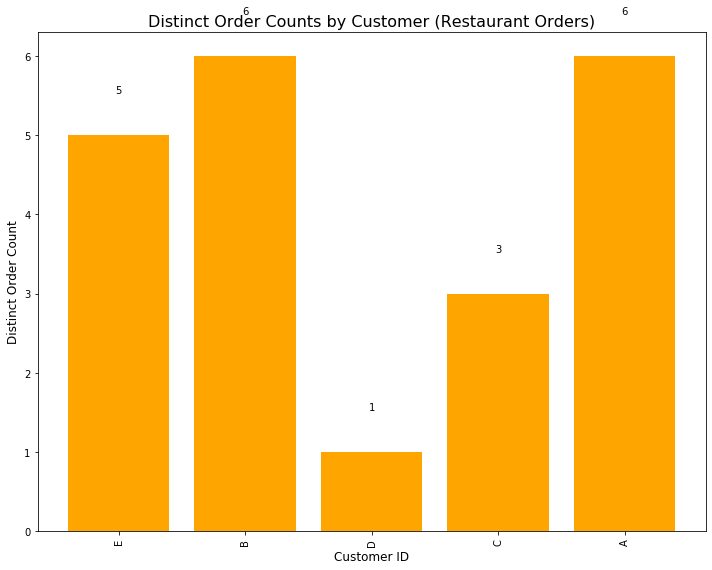

In [47]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = df.collect()

# Extract customer IDs and distinct order counts
customer_ids = [row['customer_id'] for row in data]
distinct_order_counts = [row['count(order_date)'] for row in data]

# Create a bar chart
plt.figure(figsize=(10,8 ))
bars = plt.bar(customer_ids, distinct_order_counts, color='orange')

# Add titles and labels
plt.title('Distinct Order Counts by Customer (Restaurant Orders)', fontsize=16)
plt.xlabel('Customer ID', fontsize=12)
plt.ylabel('Distinct Order Count', fontsize=12)
plt.xticks(rotation=90)

# Add total count above each bar
for bar, count in zip(bars, distinct_order_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{count}', 
             ha='center', va='bottom', fontsize=10)

# Show the chart
plt.tight_layout() 
plt.show()


# Total Sales by each Country  

In [49]:
total_amount_spent_By_Country = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('location')
    .agg({'price': 'sum'})
)
total_amount_spent_By_Country.show() 


+--------+----------+
|location|sum(price)|
+--------+----------+
|   India|    4860.0|
|     USA|    2460.0|
|      UK|    7020.0|
+--------+----------+



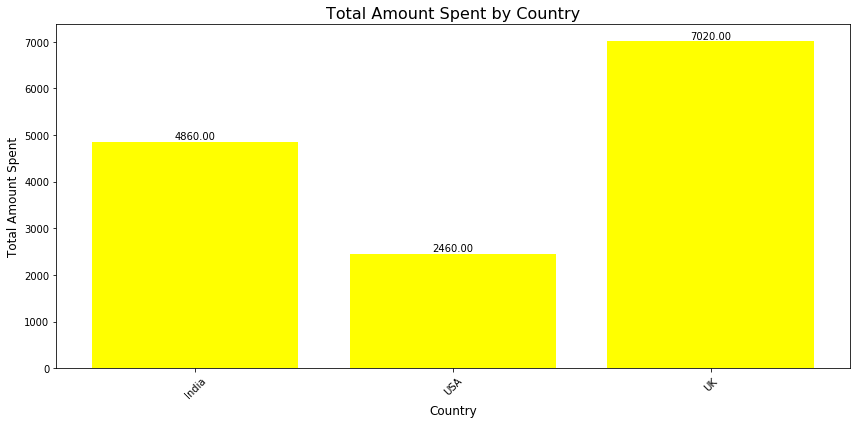

In [50]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent_By_Country.collect()

# Extract locations (countries) and total amount spent
countries = [row['location'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(countries, total_spent, color='yellow')

# Add titles and labels
plt.title('Total Amount Spent by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xticks(rotation=45)

# Add total amount above each bar
for bar, amount in zip(bars, total_spent):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f'{amount:.2f}', 
             ha='center', va='bottom', fontsize=10)

# Show the chart
plt.tight_layout()
plt.show()


# Total Sales By order_Source

In [51]:
total_amount_spent_By_order_source = (sales_df
    .join(menu_df, 'product_id')
    .groupBy('source_order')
    .agg({'price': 'sum'})
)
total_amount_spent_By_order_source.show() 


+------------+----------+
|source_order|sum(price)|
+------------+----------+
|      zomato|    4920.0|
|      Swiggy|    6330.0|
|  Restaurant|    3090.0|
+------------+----------+



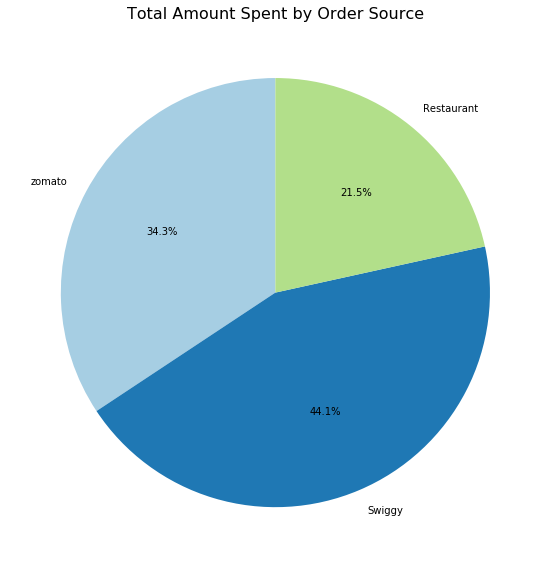

In [52]:
import matplotlib.pyplot as plt

# Collect the data from the DataFrame
data = total_amount_spent_By_order_source.collect()

# Extract order sources and total amount spent
order_sources = [row['source_order'] for row in data]
total_spent = [row['sum(price)'] for row in data]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(total_spent, labels=order_sources, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Total Amount Spent by Order Source', fontsize=16)

# Show the chart
plt.tight_layout()
plt.show()
